Overview: These were instructed delay sentence-production experiments. On each trial, the participant (T12) first saw a red square with a sentence above it (see the "sentences" variable). Then, when the square turned green, T12 either attempted to speak that sentence normally, or attempted to speak the sentence without vocalizing ("mouthing"). When T12 finished, she pressed a button on her lap that triggered the beginning of the next trial. T12 was seated in a chair facing a computer monitor where the sentences were displayed. Data was collected in a series of 'blocks' (20-50 sentences in each block), in between which T12 rested. Neural data between blocks was not recorded. During some of the blocks, the sentences were decoded in real-time and the output of the decoder was displayed on the screen. Note that the first two blocks of data were removed as held-out data for the competition (the data itself can be found in the  "competitionData" folder without the sentence labels, which will be released after the competition).

Delay periods were drawn from an exponential distribution with a task-specific mean. For sentences, the mean was 4.5 seconds, where values falling outside 4 or 5 seconds were redrawn.

Z-scoring was performed using block-specific means and standard deviations. 

In [1]:
base_dir = '/home2/ebrahim/neural_seq_decoder/'
import scipy.io
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys
sys.path.append(f"{base_dir}scripts")
from process_data_functions import compute_duration
import os
import pandas as pd

In [2]:
openwebtext_sessions = ['04.28', '05.05', '05.17', '05.19']
bin_size = 20 # ms
sentences_path = f"{base_dir}sentences/"

In [3]:
num_sessions = 0
for file in os.listdir(f'{base_dir}sentences/'):
    num_sessions+=1
print(num_sessions)

24


In [4]:
file = 't12.2022.07.27_sentences.mat'
session_X = scipy.io.loadmat(f"{sentences_path}{file}")

In [5]:
session_X.keys()

dict_keys(['__header__', '__version__', '__globals__', 'tx1', 'tx2', 'tx3', 'tx4', 'spikePow', 'audioFeatures', 'xpcClock', 'nsp1Clock', 'nsp2Clock', 'redisClock', 'trialState', 'blockNum', 'trialDelayTimes', 'goTrialEpochs', 'delayTrialEpochs', 'decoderOutput', 'ngramPartialOutput', 'ngramFinalOutput', 'audio', 'audioEnvelope', 'sentencesFeatures', 'sentences', 'sentenceDurations', 'blockList', 'blockTypes', 'speakingMode'])

In [ ]:
for file in os.listdir(sentences_path):
    
    if np.sum([1 for x in openwebtext_sessions if x in file]) == 1:
        continue
    
    session_X = scipy.io.loadmat(f"{sentences_path}{file}")
    delays = session_X['trialDelayTimes']
    #plt.hist(delays)
    trialState = session_X['trialState']
    delays_from_trialstate = []
    delay_dur = 0
    for t in trialState:
        if t == 0:
            delay_dur += bin_size      
        else:
            if delay_dur > 0:
                delays_from_trialstate.append(delay_dur/1000)  
            delay_dur = 0
            
    #plt.hist(delays_from_trialstate)
    #plt.show()
    print(file)
    print(np.min(delays), np.max(delays))
    print(np.min(delays_from_trialstate), np.max(delays_from_trialstate))

In [16]:
np.unique(np.diff(xpcClock.squeeze()))

array([        20, 4294423876, 4294477696, 4294493376, 4294498616,
       4294511176, 4294522436, 4294529756, 4294575736, 4294588296,
       4294596056, 4294680036], dtype=uint32)

In [9]:


trialState = session_X['trialState']
xpcClock = session_X['xpcClock']
time_between_delay_go = []
time_to_next_trial = []
for i, t in enumerate(trialState):
    if t == 1 and trialState[i-1] == 0:
        first_go_bin = xpcClock[i]
        last_delay_bin = xpcClock[i-1]
        time_between_delay_go.append([int(last_delay_bin), int(first_go_bin)])
    if t == 0 and trialState[i-1] == 1:
        first_delay_bin = xpcClock[i]
        last_go_bin = xpcClock[i-1]
        time_to_next_trial.append([int(last_go_bin), int(first_delay_bin)])
        
print(time_between_delay_go[0:10])
print(time_to_next_trial[0:10])

/tmp/ipykernel_1059109/693495073.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_between_delay_go.append([int(last_delay_bin), int(first_go_bin)])
/tmp/ipykernel_1059109/693495073.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_to_next_trial.append([int(last_go_bin), int(first_delay_bin)])


[[28360, 28380], [37860, 37880], [49360, 49380], [56580, 56600], [69720, 69740], [81220, 81240], [91100, 91120], [100040, 100060], [110040, 110060], [120660, 120680]]
[[34300, 34320], [45900, 45920], [52800, 52820], [65780, 65800], [77680, 77700], [88020, 88040], [96260, 96280], [106460, 106480], [117600, 117620], [127000, 127020]]


167711


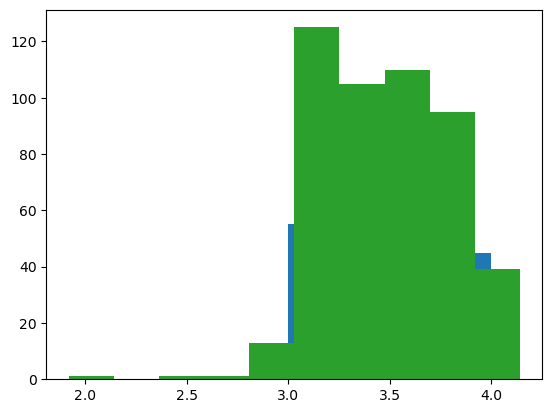

t12.2022.07.27_sentences.mat
3.0 4.0
1.92 4.14
1.92 4.14


In [136]:

delays = session_X['trialDelayTimes']

trialState = session_X['trialState']
delays_from_trialstate = []
delays_from_clock = []
delay_dur = 0
startTime = None
for i, t in enumerate(trialState):
    if t == 0:
        delay_dur += bin_size  
        if startTime is None: 
            startTime = session_X['xpcClock'][i]
    else:
        if delay_dur > 0:
            endTime = session_X['xpcClock'][i]
            clockTime = ((endTime - startTime)/1000)[0]
            delays_from_clock.append(clockTime)
            delays_from_trialstate.append(delay_dur/1000)  
        delay_dur = 0
        startTime = None
        
plt.hist(delays)
plt.hist(delays_from_trialstate)
plt.hist(delays_from_clock)
plt.show()
print(file)
print(np.min(delays), np.max(delays))
print(np.min(delays_from_trialstate), np.max(delays_from_trialstate))
print(np.min(delays_from_clock), np.max(delays_from_clock))

In [133]:
print(len(delays), len(delays_from_trialstate))

490 490


In [17]:
# check max amount of time patient took for a sentence
per_session_max_go = []
per_session_max_delay = []
file_name = {}
for file in os.listdir(sentences_path):
    mat_data = scipy.io.loadmat(f'{sentences_path}{file}')
    print(file)
    delay_durations_sec = mat_data['trialDelayTimes']
    print(np.min(delay_durations_sec), round(np.mean(delay_durations_sec),2), np.max(delay_durations_sec))

t12.2022.07.29_sentences.mat
3.0 3.49 4.0
t12.2022.04.28_sentences.mat
8.02 8.51 9.0
t12.2022.08.23_sentences.mat
3.0 3.5 4.0
t12.2022.08.25_sentences.mat
3.0 3.48 4.0
t12.2022.08.18_sentences.mat
3.0 3.49 4.0
t12.2022.05.05_sentences.mat
8.0 8.51 9.0
t12.2022.06.07_sentences.mat
3.0 3.5 4.0
t12.2022.05.26_sentences.mat
3.0 3.48 4.0
t12.2022.08.13_sentences.mat
3.0 3.48 4.0
t12.2022.05.24_sentences.mat
3.0 3.49 4.0
t12.2022.05.19_sentences.mat
3.0 3.47 4.0
t12.2022.07.14_sentences.mat
3.0 3.48 4.0
t12.2022.06.16_sentences.mat
3.0 3.49 4.0
t12.2022.05.17_sentences.mat
5.0 5.61 8.98
t12.2022.06.14_sentences.mat
3.0 3.5 4.0
t12.2022.06.23_sentences.mat
3.0 3.48 4.0
t12.2022.08.11_sentences.mat
3.0 3.49 4.0
t12.2022.07.21_sentences.mat
3.0 3.49 4.0
t12.2022.07.27_sentences.mat
3.0 3.48 4.0
t12.2022.06.28_sentences.mat
3.0 3.47 4.0
t12.2022.06.21_sentences.mat
3.0 3.49 4.0
t12.2022.08.02_sentences.mat
3.0 3.49 4.0
t12.2022.06.02_sentences.mat
3.0 3.49 4.0
t12.2022.07.05_sentences.mat
3.0 3.

array([20480], dtype=uint32)

In [72]:
num_bins_delay = 0
startTime = None
for i, m in enumerate(mat_data['trialState']):
    if m == 0:
        if startTime is None:
            startTime = mat_data['xpcClock'][i]
        num_bins_delay+=1
    else:
        endTime = mat_data['xpcClock'][i]
        break
    
print(num_bins_delay*20/1000)
print(((endTime - startTime)/1000)[0])
print(mat_data['trialDelayTimes'][0][0])
print(mat_data['delayTrialEpochs'][0][1]*20/1000)


3.16
3.16
3.22
3.16


In [73]:
print('goTrialEpochs')

goTrialEpochs


In [61]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'tx1', 'tx2', 'tx3', 'tx4', 'spikePow', 'audioFeatures', 'xpcClock', 'nsp1Clock', 'nsp2Clock', 'redisClock', 'trialState', 'blockNum', 'trialDelayTimes', 'goTrialEpochs', 'delayTrialEpochs', 'decoderOutput', 'ngramPartialOutput', 'ngramFinalOutput', 'audio', 'audioEnvelope', 'sentencesFeatures', 'sentences', 'sentenceDurations', 'blockList', 'blockTypes', 'speakingMode'])

In [39]:
(587-409)*20/1000

3.56

In [98]:
def load_data_session_pd(session_path, file):
    
    mat_data = scipy.io.loadmat(f'{session_path}{file}')
    blockNum = mat_data['blockNum'].squeeze()
    
    # zscore neural data within each block 
    spikePow_z = zscore_by_blocks(mat_data['spikePow'], blockNum)
    rmsThresh_z = zscore_by_blocks(mat_data['tx2'], blockNum)
    
    return spikePow, rmsThresh

In [143]:
load_file = 't12.2022.06.14_sentences.mat'
session_path = 'sentences/'
spikePow, rmsThresh, delayEpochs, goEpochs = load_data_session_pd(session_path, load_file)

In [144]:
delayDurations = compute_duration(delayEpochs)
np.min(delayDurations)

149

<Axes: >

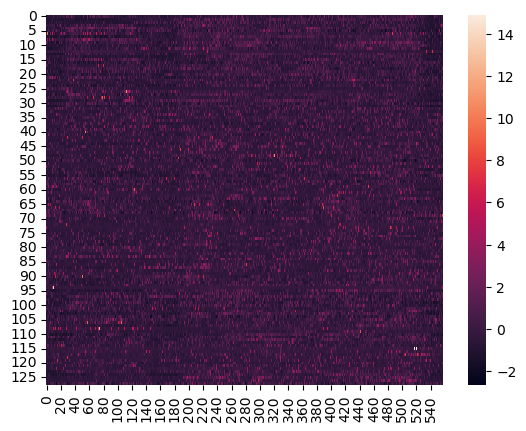

In [154]:
i = 100
firstdelay = spikePow[delayEpochs[i][0]-1:delayEpochs[i][1]-1]
firstGo = spikePow[goEpochs[i][0]-1:goEpochs[i][1]-1]
firsttrial = np.vstack((firstdelay, firstGo))
sns.heatmap(firsttrial[:, :128].T)

In [4]:
sentences_text_mat = np.array(mat_data['sentences'].squeeze())
sentences_text = []
for s in sentences_text_mat:
    sentences_text.append(str(s).replace('[', '').replace(']', '').replace("'", ''))

In [65]:
delayTrialEpochs = mat_data['delayTrialEpochs']
delay_duration = []
for d in delayTrialEpochs:
    delay_duration.append(d[1]-d[0])
min_delay = min(delay_duration) 
print(f"Minimum delay duration: {min(delay_duration)}")
delay_spikepow = []
for d in delayTrialEpochs:
    delayEnd = d[1] - 1
    delayPeriod_activity = spikePow[delayEnd-min_delay:delayEnd]
    delay_spikepow.append(delayPeriod_activity)
    
delay_spikepow = np.stack(delay_spikepow)

Minimum delay duration: 399


In [66]:
goEpochs = mat_data['goTrialEpochs']
go_duration = []
for g in goEpochs:
    go_duration.append(g[1]-g[0])
min_go = min(go_duration) 
print(f"Minimum go duration: {min_go}")
go_spikepow = []
for g in goEpochs:
    goStart = g[0] - 1
    goPeriod_activity = spikePow[goStart:goStart+min_go]
    go_spikepow.append(goPeriod_activity)
    
go_spikepow = np.stack(go_spikepow)

Minimum go duration: 227


In [68]:
len(delayTrialEpochs)

300

In [8]:
all_activity = np.hstack((delay_spikepow, go_spikepow))
all_activity_z = (all_activity - np.mean(all_activity, axis=(0,1)))/np.std(all_activity, axis=(0,1))

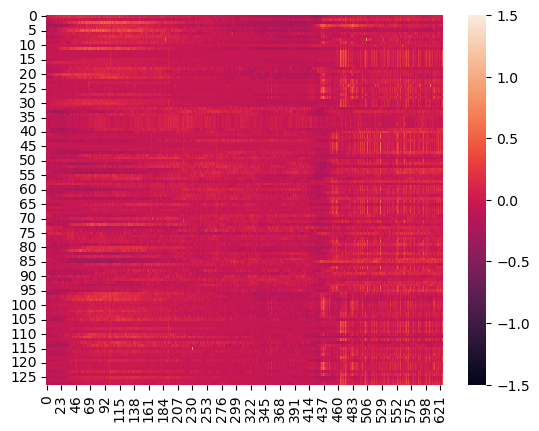

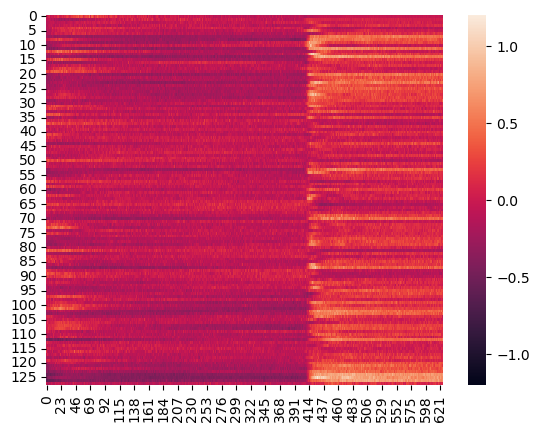

In [9]:
trial_avg_delay_spikepow = np.mean(all_activity_z, axis=0)
sns.heatmap(trial_avg_delay_spikepow[:, 128:].T, vmin=-1.5, vmax=1.5)
plt.show()
sns.heatmap(trial_avg_delay_spikepow[:, :128].T, vmin=-1.2, vmax=1.2)
plt.show()

In [ ]:
z